### 라이브러리 선언

In [60]:
# 데이터 조작 및 숫자연산
import pandas as pd
import numpy as np
# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# 분석모델
from sklearn.tree import DecisionTreeRegressor

In [62]:
# 분석평가 지표
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### 데이터 불러오기

In [63]:
selloutData = pd.read_csv("../dataset/feature_regression_example.csv")

### EDA (Exploratory Data Analysis)

In [64]:
selloutData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REGIONID      105 non-null    object 
 1   PRODUCTGROUP  105 non-null    object 
 2   PRODUCT       105 non-null    object 
 3   ITEM          105 non-null    object 
 4   YEARWEEK      105 non-null    int64  
 5   YEAR          105 non-null    int64  
 6   WEEK          105 non-null    int64  
 7   QTY           105 non-null    int64  
 8   HOLIDAY       105 non-null    object 
 9   HCLUS         105 non-null    int64  
 10  PROMOTION     105 non-null    object 
 11  PRO_PERCENT   105 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 10.0+ KB


In [65]:
selloutData.shape

(105, 12)

In [66]:
# 데이터 통계값 확인
selloutData.describe()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,201576.276190,2015.495238,26.752381,1210.238095,2.742857,0.205780
std,52.254278,0.502375,15.229514,820.097819,1.587382,0.128636
min,201501.000000,2015.000000,1.000000,15.000000,0.000000,0.000000
25%,201527.000000,2015.000000,14.000000,542.000000,1.000000,0.208155
50%,201553.000000,2015.000000,27.000000,1139.000000,4.000000,0.209442
75%,201626.000000,2016.000000,40.000000,1753.000000,4.000000,0.280258
max,201652.000000,2016.000000,53.000000,4035.000000,4.000000,0.421888


C:\Users\kopo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='QTY', ylabel='Density'>

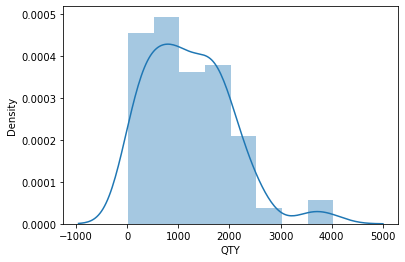

In [67]:
sns.distplot(selloutData.QTY)

### 1. 타입 통합/특성 숫자컬럼 추가

In [68]:
selloutData.dtypes

REGIONID         object
PRODUCTGROUP     object
PRODUCT          object
ITEM             object
YEARWEEK          int64
YEAR              int64
WEEK              int64
QTY               int64
HOLIDAY          object
HCLUS             int64
PROMOTION        object
PRO_PERCENT     float64
dtype: object

In [69]:
selloutData.PROMOTION.drop_duplicates()

0    Y
9    N
Name: PROMOTION, dtype: object

In [70]:
ynMap = {"Y":1, "N":0}

In [71]:
selloutData["PROMOTION_MAP"] = selloutData.PROMOTION.map(ynMap)
selloutData["HOLIDAY_MAP"] = selloutData.HOLIDAY.map(ynMap)
selloutData.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_MAP,HOLIDAY_MAP
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0


### 2. 특성 선정 / 데이터 분리

### 2-1. 특성 선정

In [72]:
corrStd = 0.5

In [73]:
corrDf = selloutData.corr()

In [74]:
label=["QTY"]

In [75]:
features = \
    list( corrDf.loc[ (abs( corrDf.QTY ) > corrStd ) & (corrDf.QTY != 1 ) ].index )

### 2-2. 데이터 분리

In [76]:
sortKey = ["ITEM","YEARWEEK"]

In [77]:
sortedData = selloutData.sort_values(sortKey)
sortedData.shape

(105, 14)

In [78]:
# 전체 데이터 row 의 80% 시점의 index값 정의
stdIndex = int( sortedData.shape[0] * 0.8 )

In [79]:
stdYearWeek = sortedData.loc[stdIndex].YEARWEEK

In [80]:
trainingDataFeatures = sortedData.loc[ sortedData.YEARWEEK < stdYearWeek, features]
trainingDataLabel = sortedData.loc[ sortedData.YEARWEEK < stdYearWeek, label]
testDataFeatures = sortedData.loc[ sortedData.YEARWEEK >= stdYearWeek, features]
testDataLabel = sortedData.loc[ sortedData.YEARWEEK >= stdYearWeek, label]

In [81]:
testDataAll = sortedData.loc[ sortedData.YEARWEEK >= stdYearWeek]

In [82]:
print(trainingDataFeatures.shape)
print(trainingDataLabel.shape)
print(testDataFeatures.shape)
print(testDataLabel.shape)

(84, 4)
(84, 1)
(21, 4)
(21, 1)


### 3. 모델 적용

In [83]:
modelMethod = DecisionTreeRegressor(random_state=1)

In [118]:
# modelMethod = DecisionTreeRegressor(random_state=1, max_depth=3)

In [84]:
modelCoeff = modelMethod.fit(X=trainingDataFeatures, 
                             y=trainingDataLabel)

In [85]:
modelCoeff

DecisionTreeRegressor(random_state=1)

In [86]:
from sklearn.tree import export_graphviz

In [87]:
import graphviz

In [88]:
dot_data = export_graphviz(decision_tree=modelCoeff,
                           rounded=True)

In [89]:
graph = graphviz.Source(dot_data, format="png")

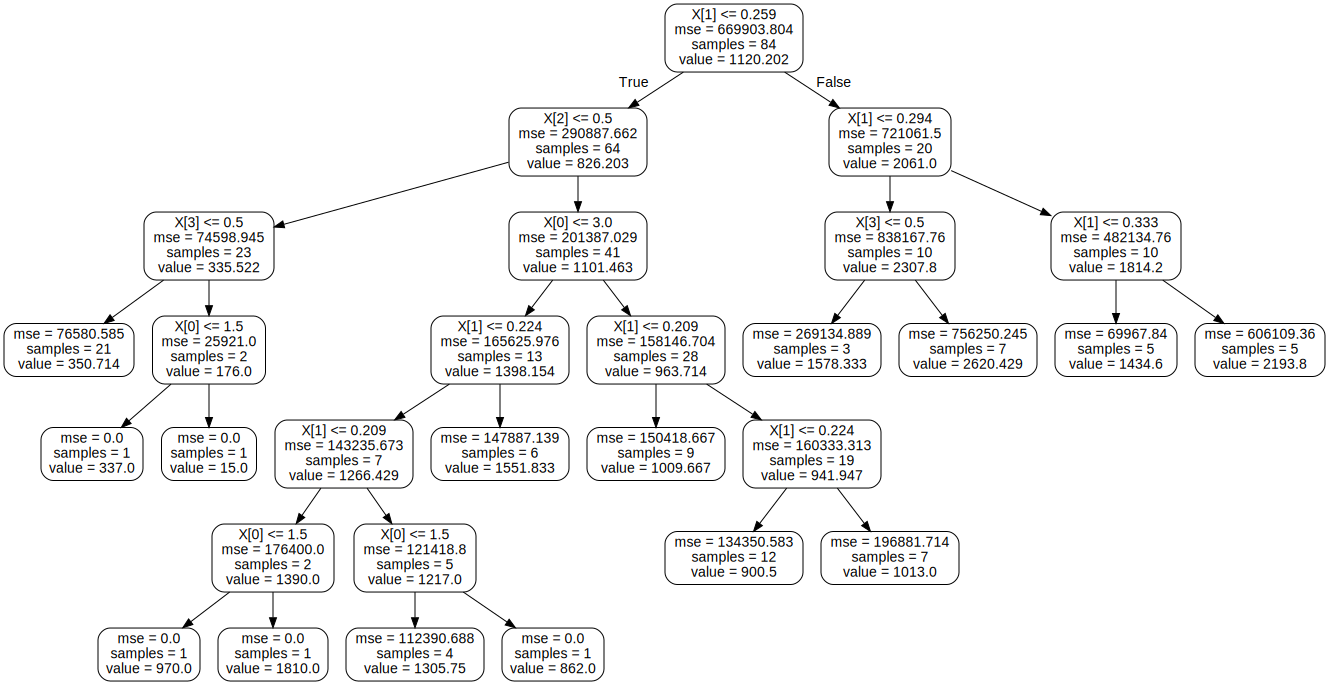

In [90]:
graph

In [91]:
graph.render("dt_tree", format="png")

'dt_tree.png'

In [92]:
features[1]

'PRO_PERCENT'

In [93]:
trainingDataFeatures.shape

(84, 4)

In [94]:
step1 = trainingDataFeatures.loc[ trainingDataFeatures.PRO_PERCENT > 0.259]

In [95]:
step1.shape

(20, 4)

In [96]:
step1.index

Int64Index([25, 26, 27, 28, 44, 45, 46, 47, 48, 72, 73, 74, 75, 77, 78, 79, 80,
            81, 82, 83],
           dtype='int64')

In [97]:
trainingDataLabel.loc[ step1.index ].QTY.mean()

2061.0

In [98]:
step2 = step1.loc[step1.PRO_PERCENT <= 0.294 ]

In [99]:
step2.shape

(10, 4)

In [100]:
step2.index

Int64Index([25, 26, 27, 28, 72, 73, 74, 75, 82, 83], dtype='int64')

In [101]:
trainingDataLabel.loc[ step2.index ].QTY.mean()

2307.8

In [102]:
features[3]

'HOLIDAY_MAP'

In [103]:
step3 = step2.loc[step2.HOLIDAY_MAP > 0.5 ]

In [104]:
step3.shape

(7, 4)

In [105]:
step3.index

Int64Index([25, 26, 27, 28, 72, 73, 74], dtype='int64')

In [106]:
trainingDataLabel.loc[ step3.index ].QTY.mean()

2620.4285714285716

In [107]:
### 할인율 25.9 < 할인 < 29.4
### holiday map > 0.5

### 4. 예측

In [108]:
predictValue=modelCoeff.predict(testDataFeatures)

In [109]:
predictValue

array([1578.33333333,  350.71428571, 1434.6       , 1434.6       ,
       1434.6       , 1434.6       , 1434.6       , 1578.33333333,
       1578.33333333, 2620.42857143, 1578.33333333,  350.71428571,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       2193.8       ])

### 5. 데이터 정리

In [110]:
testDataAll.head(2)

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_MAP,HOLIDAY_MAP
84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,1,0
85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0


In [111]:
testDataAll["PREDICT_DT"] = predictValue

C:\Users\kopo\AppData\Local\Temp/ipykernel_18260/3972717254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDataAll["PREDICT_DT"] = predictValue


In [117]:
testDataAll

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,PROMOTION_MAP,HOLIDAY_MAP,PREDICT_DT
84,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201632,2016,32,2100,N,4,Y,0.280258,1,0,1578.333333
85,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201633,2016,33,43,N,4,N,0.000000,0,0,350.714286
86,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201634,2016,34,1700,Y,1,Y,0.308584,1,1,1434.600000
87,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201635,2016,35,1514,Y,1,Y,0.308584,1,1,1434.600000
88,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201636,2016,36,1501,Y,1,Y,0.308584,1,1,1434.600000
89,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201637,2016,37,1491,N,4,Y,0.308584,1,0,1434.600000
90,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201638,2016,38,806,N,4,Y,0.308584,1,0,1434.600000
91,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201639,2016,39,2111,N,4,Y,0.280258,1,0,1578.333333
92,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201640,2016,40,2400,N,4,Y,0.280258,1,0,1578.333333
93,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201641,2016,41,2010,Y,2,Y,0.280258,1,1,2620.428571


### 6. 데이터 시각화

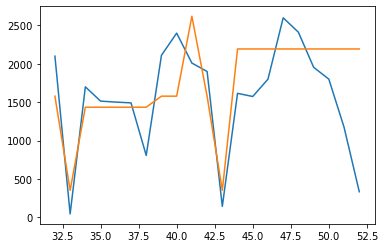

In [112]:
plt.plot(testDataAll.WEEK, testDataAll.QTY)
plt.plot(testDataAll.WEEK, testDataAll.PREDICT_DT)

### [참고] 학습된 coeff 활용 미래데이터 예측하기

In [113]:
features

['HCLUS', 'PRO_PERCENT', 'PROMOTION_MAP', 'HOLIDAY_MAP']

In [114]:
testHCLUS = 1 # 대휴일이 1 소휴일이 1
testPRO_PERCENT = 0.50 #할인율
testPROMOTIONMAP = 1
testHolidayMap = 1

In [115]:
testDf = \
    pd.DataFrame( [[ testHCLUS, testPRO_PERCENT, testPROMOTIONMAP, testHolidayMap]] )

In [116]:
modelCoeff.predict(testDf)

array([2193.8])